# Homework 10

## Due Nov 9th, 2020

## Fill in your name

In [20]:
first_name = "Shariq"
last_name = "Jamil"

assert(len(first_name) != 0)
assert(len(last_name)  != 0)
print(first_name, last_name)

Shariq Jamil


# Problem 1: Word Lengths
We are interested in the distribution of word lengths in English words.

Write a function wordLengths() that takes a path to a list of words
and returns a list with tuples holding the number of words of each word length.

Sort your list by length of word.  

#### Here are my partial results: words.txt holds 85 words of length 2, 908 words of length 3, and 3 words of length 21.   

```python
[(2, 85), (3, 908), ... (21, 3)]
```

In [21]:
'''
Takes a file that holds words. Returns a list with
tuples holding the number of words of each word length
'''
def wordLengths(filepath):
    # read specified file
    inputfile = open(filepath, "r")
    # place all the line seperated words in a list
    words = inputfile.read().splitlines()
    # list to hold word length frequency list
    lengths = [0] * 50
    
    for word in words:
        length = len(word)
        # increment frequency of this word's length
        # the index will correspond to the word's length
        lengths[length] += 1
    
    # create a list of tuples using frequency (value) and word length (index) 
    list_tuples = [(index, freq) for index, freq in enumerate(lengths) if freq > 0]
    return list_tuples

## Test cases for wordLengths

In [22]:
filepath = 'words.txt'

def test_wordLengths(filepath):
    lst = wordLengths(filepath)
    print(lst)
    
    print(lst[0])
    assert lst[0] == (2, 85)
    assert lst[1] == (3, 908)
    assert lst[5] == (7, 21727)
    assert lst[-1] == (21, 3)
    
    print('\nSuccess!')

test_wordLengths(filepath)

[(2, 85), (3, 908), (4, 3686), (5, 8258), (6, 14374), (7, 21727), (8, 26447), (9, 16658), (10, 9199), (11, 5296), (12, 3166), (13, 1960), (14, 1023), (15, 557), (16, 261), (17, 132), (18, 48), (19, 16), (20, 5), (21, 3)]
(2, 85)

Success!


# Problem 2: Draw a histogram of the word lengths

Use matplotlib to draw a histogram of the word lengths.  You may want to peek at the documentation

https://matplotlib.org/3.1.1/gallery/statistics/hist.html

or at this tutorial

https://datatofish.com/plot-histogram-python/

Does the histogram lineup with your results from problem 1?

In [23]:
import matplotlib.pyplot as plt

def plot_histogram(filepath):
    # read specified file
    inputfile = open(filepath, "r")
    # place all the line seperated words in a list
    words = inputfile.read().splitlines()
    # store the length of each word in a list
    lengths = []
    for word in words:
        lengths.append(len(word))
    # display word length frequencies
    plt.hist(lengths, bins = 20)
    plt.show()

### Unit test of Plot Histogram

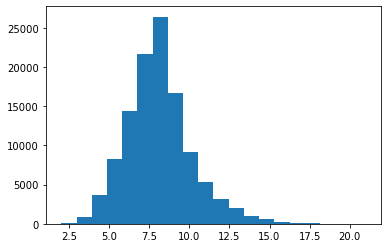

In [24]:
## Change this path to point at your copy of words.txt XXXX
plot_histogram('words.txt')

# Problem 3: Anagrams

Two words are anagrams if you can rearange the letters of the first to get the second.

Our old friends 'abut' and 'tuba' are anagrams, but so are 'abets' and 'beats'.  

However, 'hash' and 'sash', though they are the same length and made up of the same letters, are not anagrams.  

In [25]:
# Are the two words anagrams?
def are_anagrams(word1, word2):
    # convert string to lowercase and cast to list
    word2_list = list(word2.lower())
    
    # not an anagram if lengths do not match
    if(len(word1) != len(word2)):
        return False
    
    for char in word1:
        # each character in word1 must exist in word2
        if char.lower() not in word2_list:
            return False
        # match found, remove from word2 list
        word2_list.remove(char.lower())
    
    # word2 has words that are not in word1
    if(len(word2_list) > 0):
        return False
    # all conditions were satisfied
    return True

## Unit Tests

In [26]:
def test_anagrams():
    assert(are_anagrams('abets', 'beats'))
    assert(are_anagrams('hash', 'shah'))
    assert(are_anagrams('Hash', 'Shah'))
    
    assert(not are_anagrams('hash', 'sash'))
    assert not are_anagrams("zombies", "pants")
    assert are_anagrams('streams', 'masters')
    assert are_anagrams('inlets', 'listen')
    
    return('Success!')

print(test_anagrams())

Success!


# Problem 4: Space Jam

### Can Beautiful soup parse an ancient artifact?  We'll see!

In [27]:
import requests
from bs4 import BeautifulSoup

## If you haven't already installed Beautiful Soup, you will need to run

```python
    pip install bs4
```

In [28]:
## Run this if you haven't installed Beautiful Soup

! pip install bs4

## 4.1 Display https://spacejam.com/
### Using the space jam URL to request the web page.  Pretty-print the entire page

In [29]:
from bs4 import BeautifulSoup
import requests

# fetch contents of webpage
webpage = requests.get("https://spacejam.com")
webtext = webpage.text
# convert to bs object
soup = BeautifulSoup(webtext, "html.parser") 
print(soup.prettify())

<html>
 <!-- Copyright 1996 Warner Bros. Online -->
 <!-- Badda Bing, Badda Boom -->
 <head>
  <title>
   Space Jam
  </title>
  <style type="text/css">
   .footer-links {
    margin: 5px;
  }
  </style>
 </head>
 <body alink="#ff4c4c" background="img/bg_stars.gif" bgcolor="#000000" link="#ff4c4c" text="#ff0000" vlink="#ff4c4c">
  <center>
   <!--**************Ads - Don't Touch!*************************************-->
   <center>
    <nobr>
     <table border="0" cellpadding="0" cellspacing="0" height="60" width="488">
      <tr>
       <td align="center">
        <!--#include virtual="html.ng/site=spacejam&type=movie&home=no&size=234&page.allowcompete=no"-->
       </td>
       <td align="center" width="20">
       </td>
       <td align="center">
        <!--#include virtual="html.ng/site=spacejam&type=movie&home=no&size=234"-->
       </td>
      </tr>
     </table>
    </nobr>
   </center>
   <!--*******************************************************************-->
   <br/>
   <ta

## 4.2 Find all links in the page. Print out the number of links, and display each one

In [37]:
from bs4 import BeautifulSoup
import requests

# fetch contents of webpage
webpage = requests.get('https://www.extension.harvard.edu')
webtext = webpage.text
# convert to bs object
soup = BeautifulSoup(webtext, "html.parser") 
links = soup.find_all('a')
print('Number of links', len(links), '\n')
for link in links:
    print(link)

Number of links 62 

<a class="skip" href="#main-menu">Jump to navigation</a>
<a class="skip" href="#main-content">Skip to Main Content</a>
<a class="topbar__logo i-harvard-logo ir" href="https://dce.harvard.edu" target="_blank">
        Harvard Division of Continuing Education
      </a>
<a class="topbar__link" href="https://www.harvard.edu">Harvard.edu</a>
<a href="https://www.extension.harvard.edu">Harvard Extension School</a>
<a href="https://www.summer.harvard.edu">Harvard Summer School</a>
<a href="https://www.extension.harvard.edu/professional-development">Professional Development</a>
<a href="https://www.extension.harvard.edu/hilr">Learning In Retirement</a>
<a href="https://alumni.extension.harvard.edu/">Extension Alumni Association</a>
<a class="header__mobile-menu ir i-hamburger" data-grunticon-embed="" href="">Menu</a>
<a class="header__logo i-hes-logo" href="/" id="logo" rel="home" title="Home">
<noscript><img alt="Home" class="header__logo-image" src="https://www.extensio

## 4.3 Note that there are more links than planets on the page!   Look for missing links!  

Loop through the links you already found, and look for the 'alt' attribute of each image

Display any links without an 'alt' attribute

Print the number of links with an 'alt' attribute

### *The Links have images: the images associated with the planets have 'alt' attributes describing the planet*

Here is a link with an image from the DCE site

```python
<a class="header__logo i-hes-logo" href="/" id="logo" rel="home" title="Home">
<noscript><img alt="Home" class="header__logo-image" src="https://www.extension.harvard.edu/sites/extension.harvard.edu/themes/extension/logo.png"/></noscript>
</a>top.jpg"/>
```
The link (a for anchor) above includes an img, duplicated below

```python
<img alt="Home" class="header__logo-image" src="https://www.extension.harvard.edu/sites/extension.harvard.edu/themes/extension/logo.png"/>
```

The image, logo.png, has an alt tag, to provide text describing the image.  The alt text here is 'Home'.  

### Gather all img tags, then look for the 'alt' attribute for each image.  If it doesn't have alt text, display it.  

In [31]:
# display images without alt text
print(len(links))
print(links)
for link in links:
    nested_elem = link.contents[0] 
    # get all img tags under a link
    if nested_elem.name == 'img':
        # if there is no attribute tag
        if not nested_elem['alt']:
            print(link)

17
[<a href="cmp/pressbox/pressboxframes.html"><img alt="Press Box Shuttle" border="0" height="56" src="img/p-pressbox.gif" width="131"/></a>, <a href="cmp/jamcentral/jamcentralframes.html"><img alt="Jam Central" border="0" height="67" src="img/p-jamcentral.gif" width="55"/></a>, <a href="cmp/bball/bballframes.html"><img alt="Planet B-Ball" border="0" height="62" src="img/p-bball.gif" width="62"/></a>, <a href="cmp/tunes/tunesframes.html"><img alt="Lunar Tunes" border="0" height="77" src="img/p-lunartunes.gif" width="95"/></a>, <a href="cmp/lineup/lineupframes.html"><img alt="The Lineup" border="0" height="52" src="img/p-lineup.gif" width="63"/></a>, <a href="cmp/jump/jumpframes.html"><img alt="Jump Station" border="0" height="52" src="img/p-jump.gif" width="58"/></a>, <a href="cmp/junior/juniorframes.html"><img alt="Junior Jam" border="0" height="57" src="img/p-junior.gif" width="49"/></a>, <a href="https://www.wbshop.com/" target="_blank"><img alt="Warner Studio Store" border="0" hei

## 4.4 Make a dictionary mapping 'alt' texts from the images to a URLs 
### If the href doesn't start with https, it is a partial url.  Append it to the base_url.

Here are a couple of links from the page:

```python
<a href="https://policies.warnerbros.com/privacy/" target="_blank">Privacy Policy</a>
<a href="cmp/behind/behindframes.html"><img alt="Behind the Jam" border="0" height="63" src="img/p-behind.gif" width="67"/></a>
```

The first link is a full URL: you can go to https://policies.warnerbros.com/privacy/ even today

The second link, 'cmp/behind/behindframes.html' is not a valid URL.  You need to append it to the base URL, 

https://spacejam.com/

This gives a full URL, https://spacejam.com/cmp/behind/behindframes.html, which is valid

## Print the URL to the Jam Central planet.  

In [32]:
alt_urls = {}
# display images without alt text
for link in links:
    nested_elem = link.contents[0] 
    # get all img tags under a link
    if nested_elem.name == 'img':
        # if there is no attribute tag
        if 'http' not in link['href']:
            link['href'] = 'https://spacejam.com/' + link['href']
        if nested_elem['alt']:
            alt_urls[nested_elem['alt']] = link['href'] 

print(alt_urls)
print('\n')
print(alt_urls['Jam Central'])

{'Press Box Shuttle': 'https://spacejam.com/cmp/pressbox/pressboxframes.html', 'Jam Central': 'https://spacejam.com/cmp/jamcentral/jamcentralframes.html', 'Planet B-Ball': 'https://spacejam.com/cmp/bball/bballframes.html', 'Lunar Tunes': 'https://spacejam.com/cmp/tunes/tunesframes.html', 'The Lineup': 'https://spacejam.com/cmp/lineup/lineupframes.html', 'Jump Station': 'https://spacejam.com/cmp/jump/jumpframes.html', 'Junior Jam': 'https://spacejam.com/cmp/junior/juniorframes.html', 'Warner Studio Store': 'https://www.wbshop.com/', 'Stellar Souvenirs': 'https://spacejam.com/cmp/souvenirs/souvenirsframes.html', 'Site Map': 'https://spacejam.com/cmp/sitemap.html', 'Behind the Jam': 'https://spacejam.com/cmp/behind/behindframes.html'}


https://spacejam.com/cmp/jamcentral/jamcentralframes.html


# Post Mortem
How long did it take you to solve this problem set?

Did anything confuse you or cause difficulty?

In [33]:
## it took me about 6 hours. I was confused by 4.3 and 4.4 because they didn't seem to be as explicit in terms of direction.